In [ ]:
# For Vscode
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *

df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [10]:
# For Colab
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md


import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/Accelerometer_data_combined.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0


,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0


In [11]:
# I want time from 2024-07-24 11:03:00 to end to be test data and rest to be training data
df['NTP'] = pd.to_datetime(df['NTP'])
df_test = df[df['NTP'] > '2024-07-24 11:03:00']
df_train = df[df['NTP'] <= '2024-07-24 11:03:00']
df_train.shape, df_test.shape

((364816, 12), (101160, 12))

c:\Users\liuzi\Desktop\Code\Projekt\Bachelor_Project\notebooks\handlebar\../..\utils\Plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NTP'] = pd.to_datetime(df['NTP'])


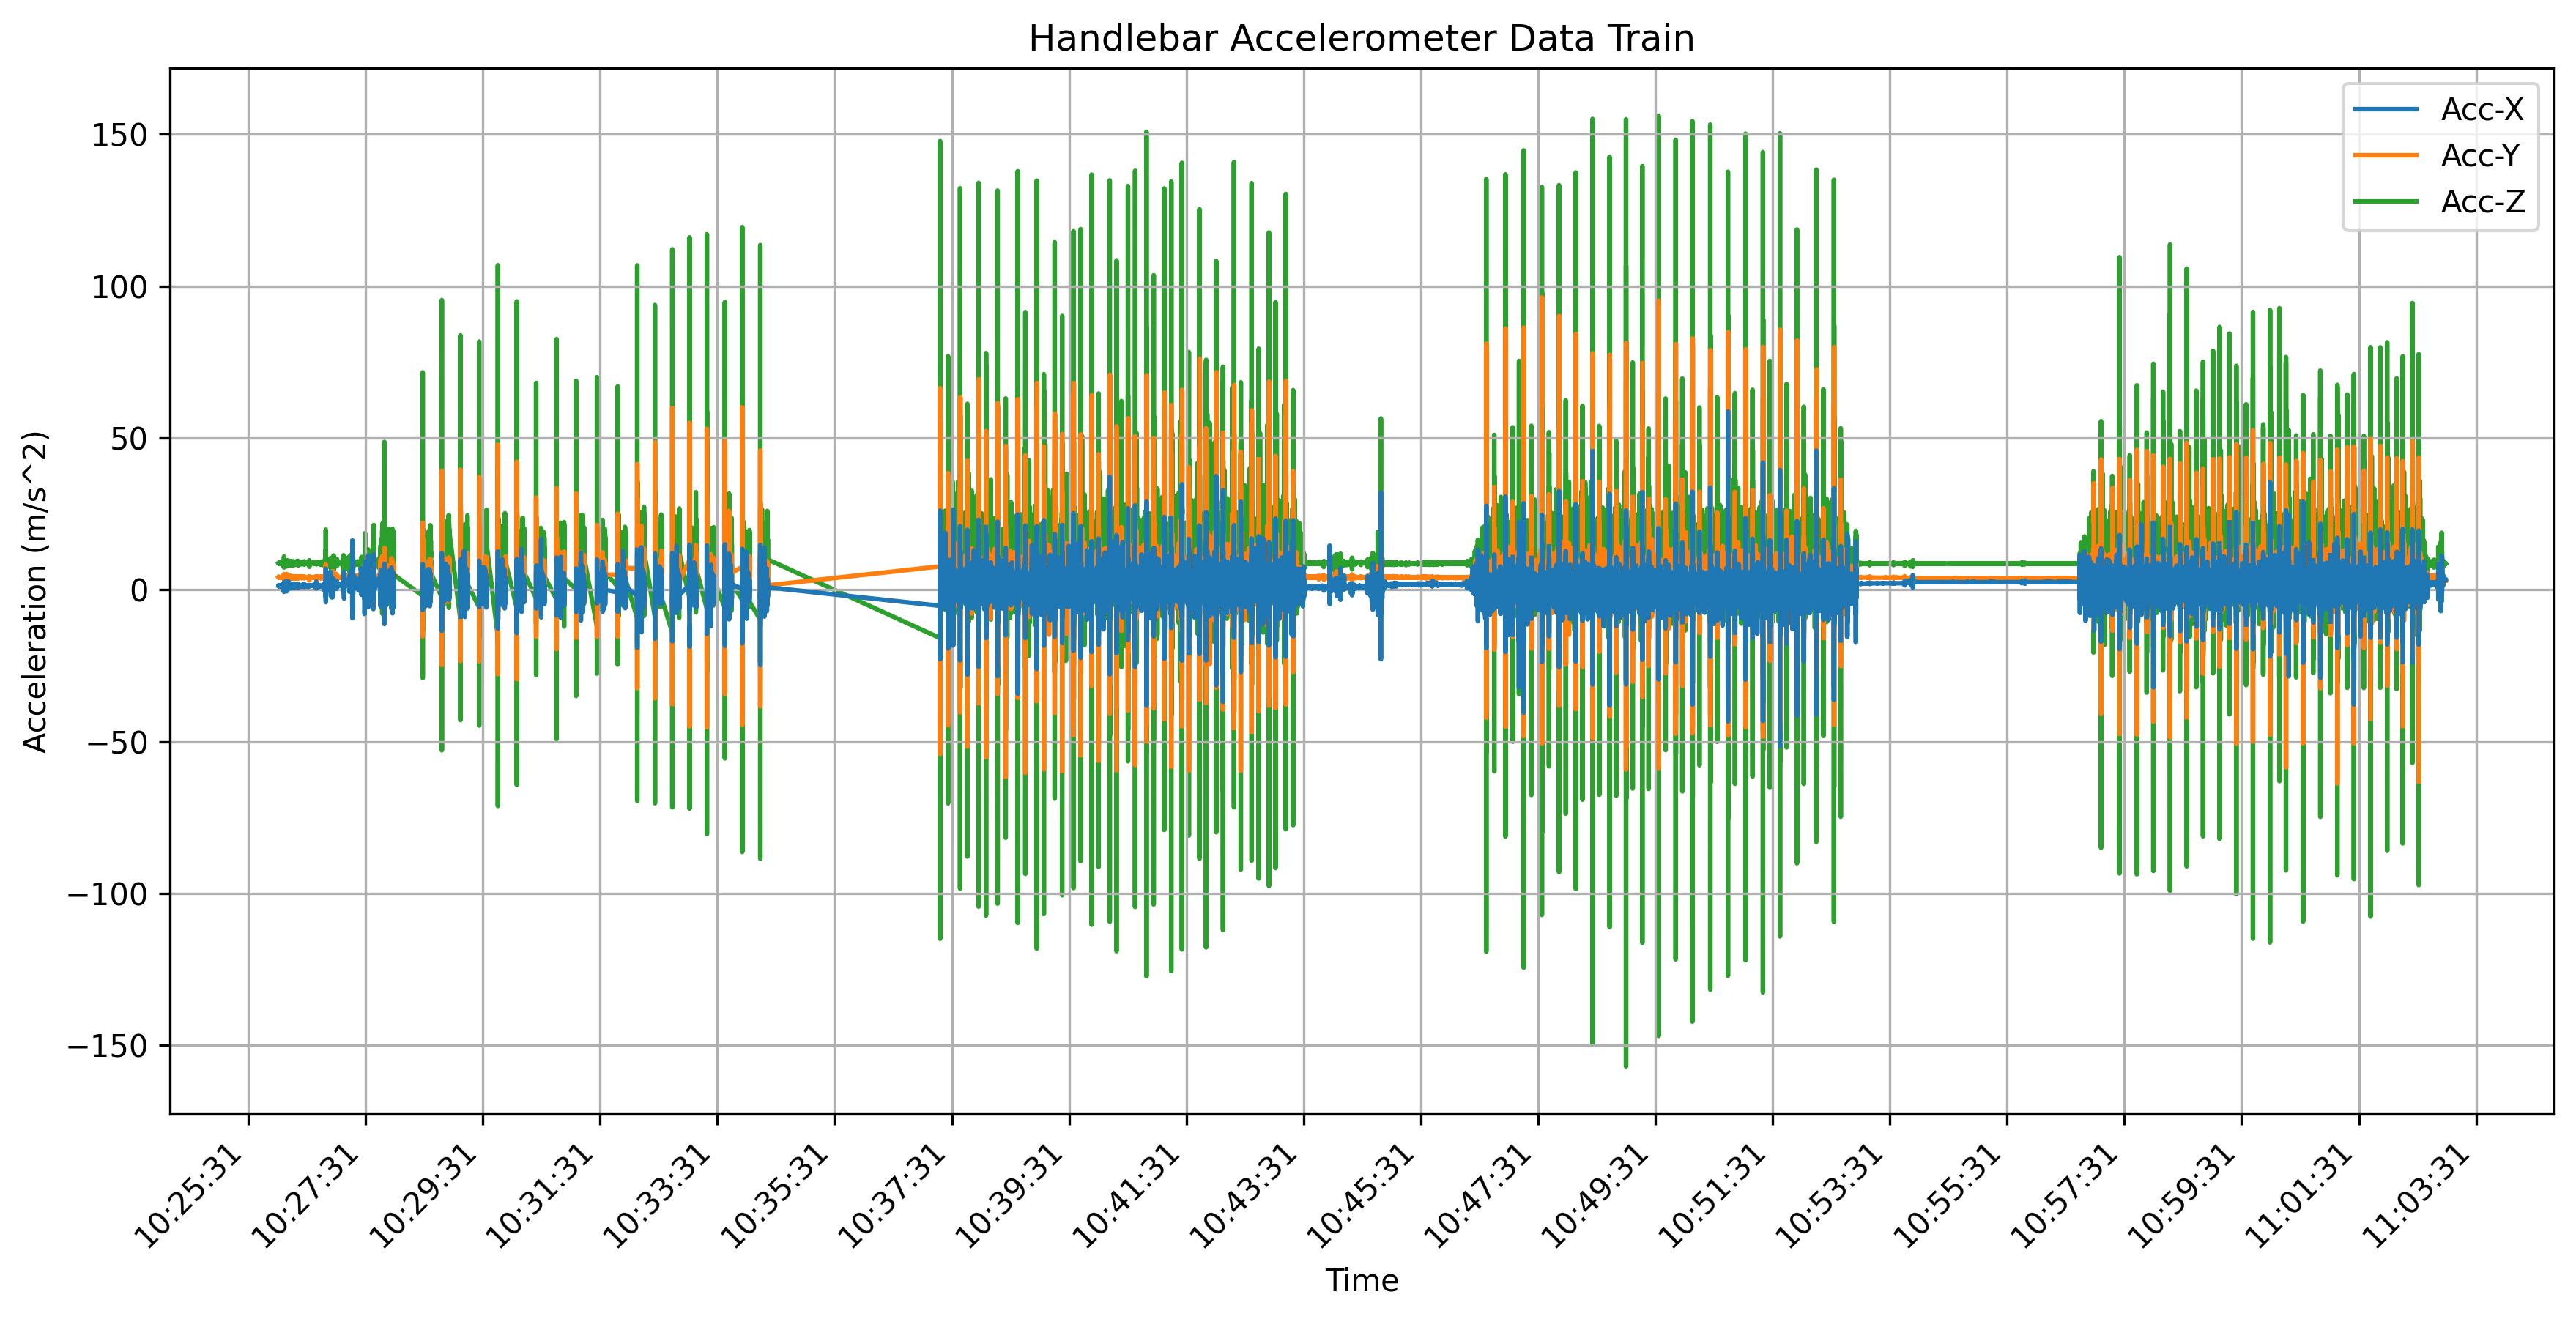

c:\Users\liuzi\Desktop\Code\Projekt\Bachelor_Project\notebooks\handlebar\../..\utils\Plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NTP'] = pd.to_datetime(df['NTP'])


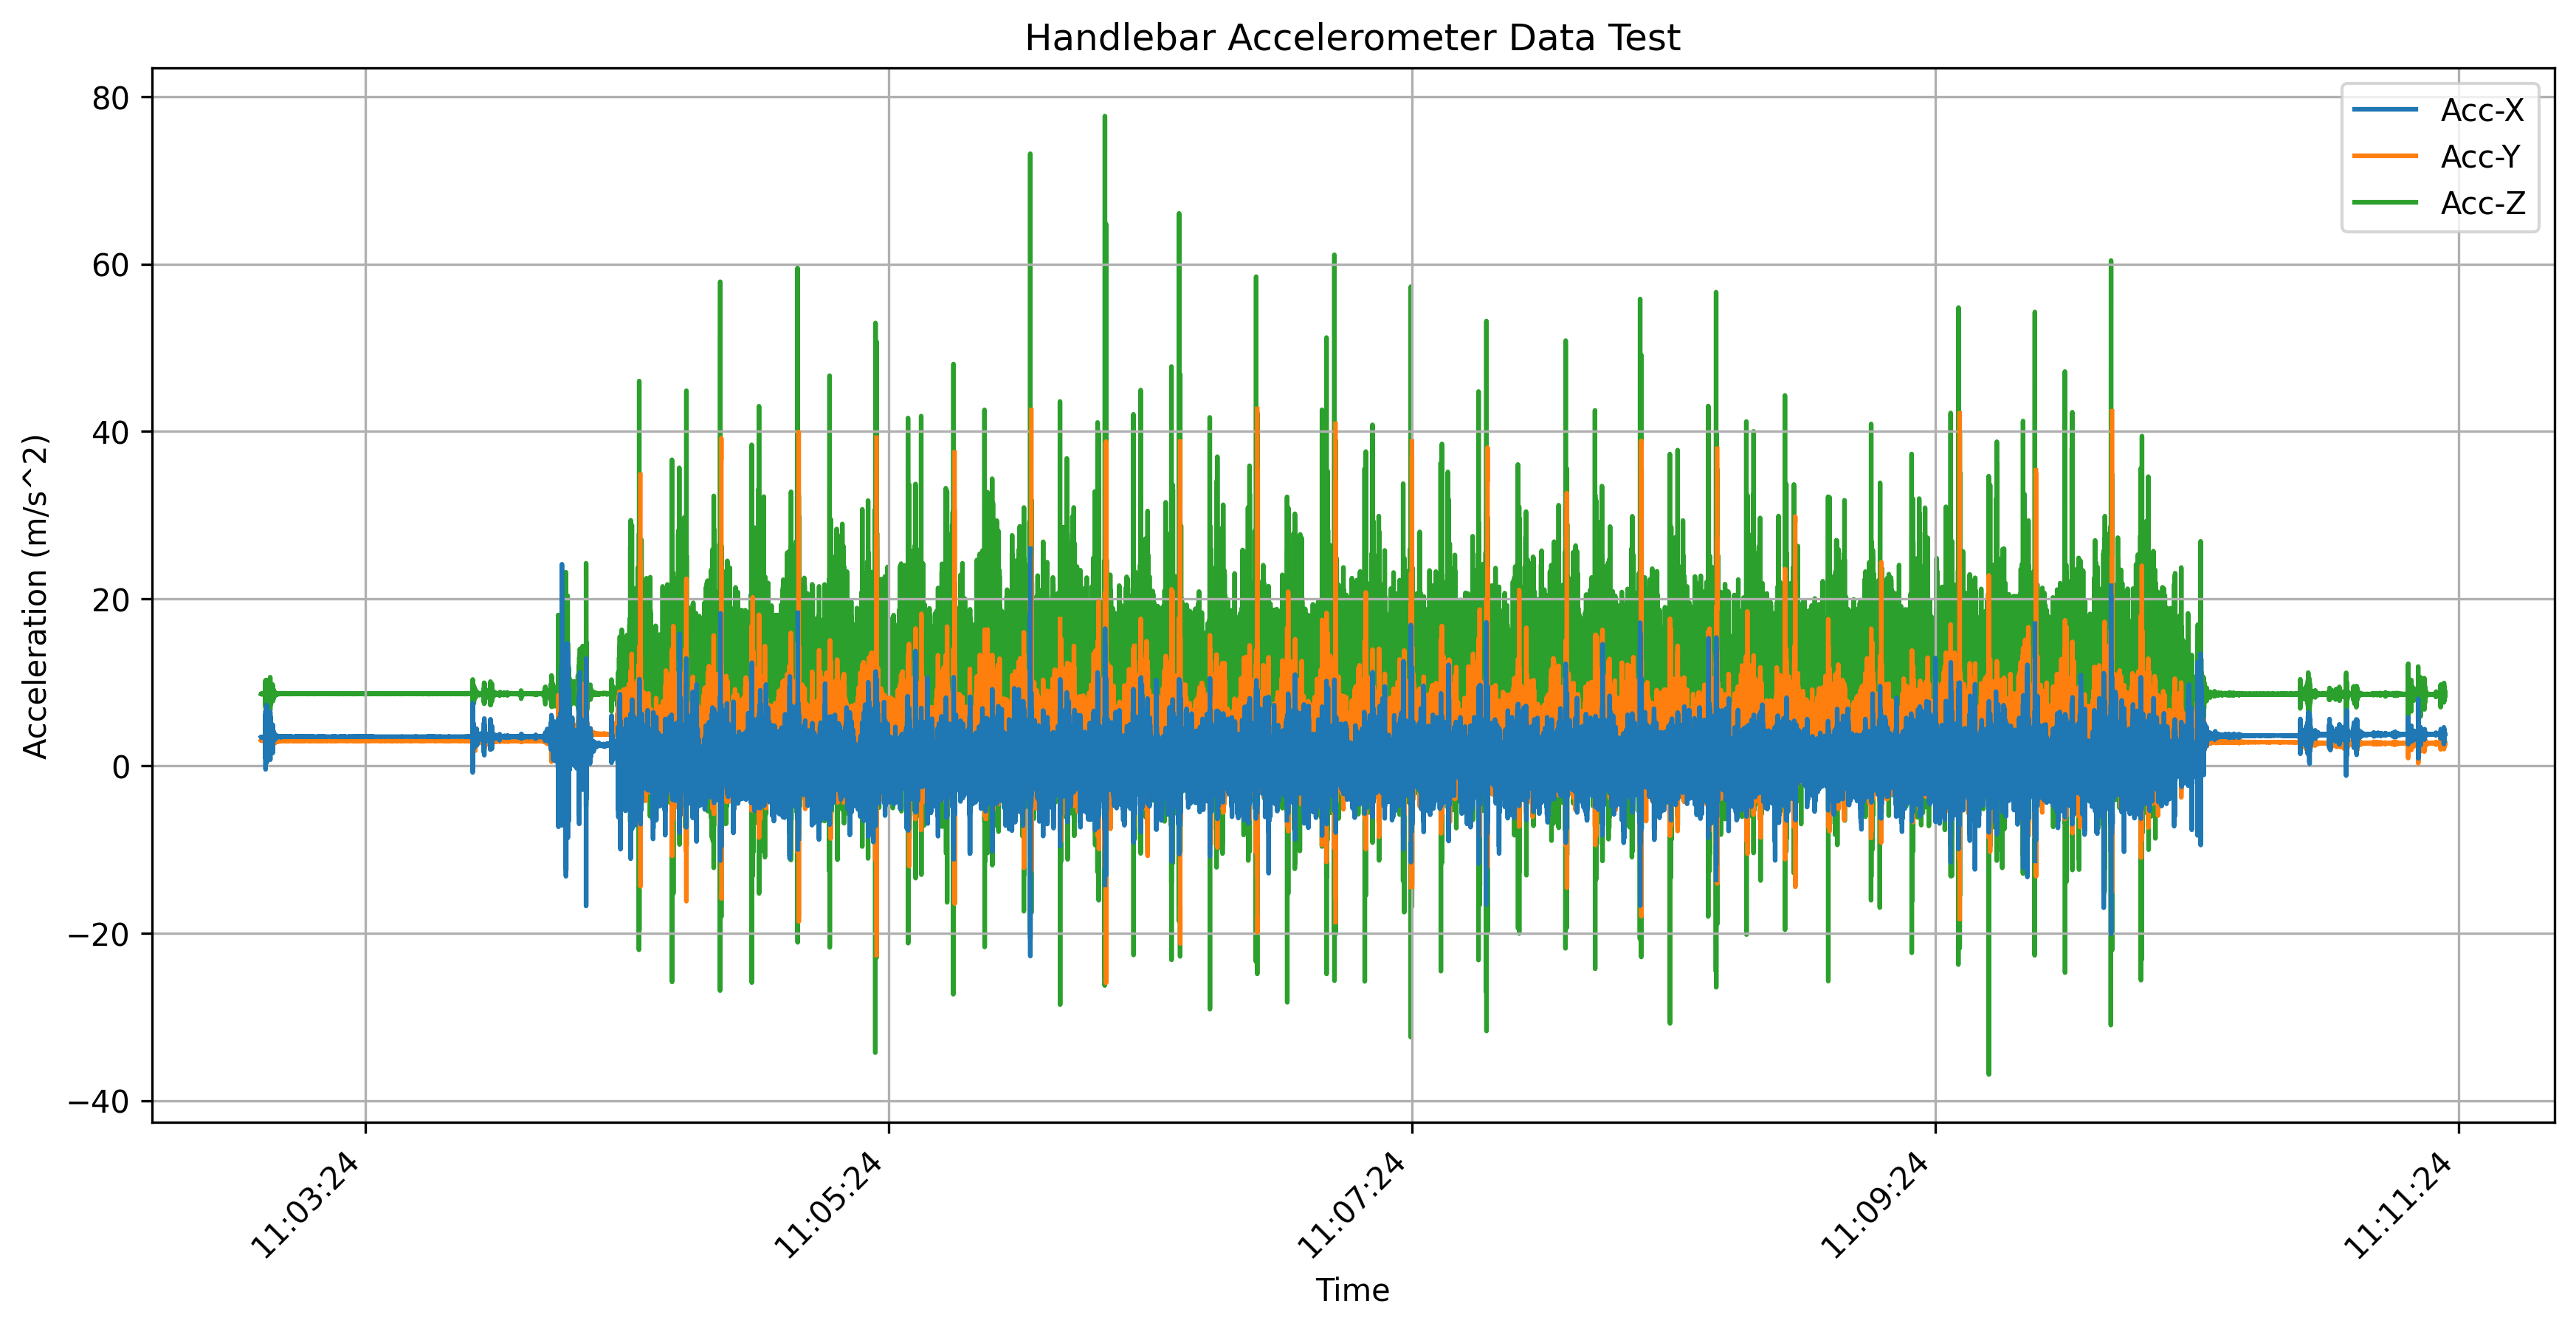

In [ ]:
# # Visualize the train,test data
# plot_accelerometer_data(df_train, 'Handlebar Accelerometer Data Train')
# plot_accelerometer_data(df_test, 'Handlebar Accelerometer Data Test')

In [12]:
#Select important feature from train and test data
df_train_filtered = df_train[['Acc-Z','curb_scene']]
df_test_filtered = df_test[['Acc-Z','curb_scene']]
df_train_filtered.shape, df_test_filtered.shape

((364816, 2), (101160, 2))

In [16]:
# just the curb_scene = 0 in train data
df_train_filtered_normal = df_train_filtered[df_train_filtered['curb_scene'] == 0]
df_train_filtered_abnormal = df_train_filtered[df_train_filtered['curb_scene'] == 1]
df_train_filtered_normal.shape,df_train_filtered_abnormal.shape

((351158, 2), (13658, 2))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_train_filtered_normal[['Acc-Z']])
df_train_filtered_normal['Acc-Z'] = scaler.transform(df_train_filtered_normal[['Acc-Z']])
df_train_filtered_abnormal['Acc-Z'] = scaler.transform(df_train_filtered_abnormal[['Acc-Z']])
df_train_filtered['Acc-Z'] = scaler.transform(df_train_filtered[['Acc-Z']])
df_test_filtered['Acc-Z'] = scaler.transform(df_test_filtered[['Acc-Z']])
#sort the data
df_train_filtered_normal.sort_index(inplace=True)

<ipython-input-17-0f24c4e02e48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered_normal['Acc-Z'] = scaler.transform(df_train_filtered_normal[['Acc-Z']])
<ipython-input-17-0f24c4e02e48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered_abnormal['Acc-Z'] = scaler.transform(df_train_filtered_abnormal[['Acc-Z']])
<ipython-input-17-0f24c4e02e48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [18]:
def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(0, len(x)-seq_size, seq_size):
        #print(i)
        #sequence of values
        x_values.append(x.iloc[i:(i+seq_size)].values)
        #value just after the sequence
        y_values.append(y.iloc[i+seq_size])

    return np.array(x_values), np.array(y_values)

In [19]:
seq_size = 100
trainX, trainY = to_sequences(df_train_filtered_normal['Acc-Z'], df_train_filtered_normal['Acc-Z'], seq_size)
testX, testY = to_sequences(df_test_filtered['Acc-Z'], df_test_filtered['Acc-Z'], seq_size)
trainX.shape, trainY.shape, testX.shape, testY.shape


((3511, 100), (3511,), (1011, 100), (1011,))

In [20]:
trainX = np.expand_dims(trainX, axis=2)
testX = np.expand_dims(testX, axis=2)
trainX.shape, testX.shape

((3511, 100, 1), (1011, 100, 1))

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
#not Overfitting
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 100, 1)              │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# fit model
history = model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.5982 - val_loss: 0.9802
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.6310 - val_loss: 0.9802
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5830 - val_loss: 0.9802
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.6193 - val_loss: 0.9802
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.6105 - val_loss: 0.9801
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.6235 - val_loss: 0.9802
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.5962 - val_loss: 0.9802
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6183 - val_loss: 0.9802
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.6279 - val_loss: 0.9802
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6151 - val_loss: 0.9803
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.6053 - val_loss: 0.9802
Epoch 12/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/ste

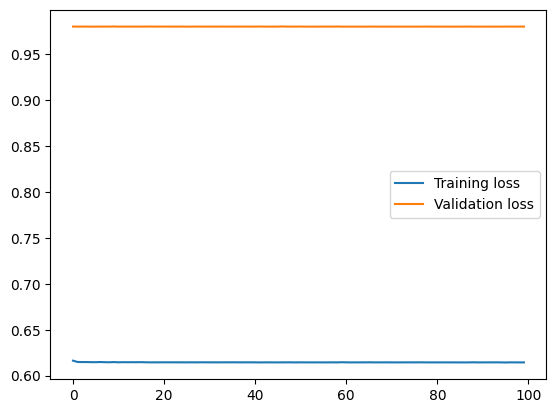

In [23]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/100


ValueError: Cannot take the length of shape with unknown rank.